NLP Day-2
1. Stopwords
2. Bag of Words
3. WordCloud

## 1. Stop Words

In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
from nltk.corpus import stopwords
nltk = stopwords.words('english')
len(nltk)

179

In [3]:
print(nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [4]:
import spacy
nlp = spacy.load('en_core_web_sm')
len(nlp.Defaults.stop_words)

326

In [5]:
stop_words_spacy = nlp.Defaults.stop_words
print(stop_words_spacy)

{'wherein', 'side', 'of', 'does', 'herein', 'serious', 'them', 'there', 'thus', 'any', 'other', 'former', 'his', 'is', 'hence', 'make', 'hers', 'ever', 'beyond', 'third', 'done', 'due', 'when', 'until', 'has', 'quite', 'with', 'they', 'nevertheless', 'another', 'often', 'call', 'already', 'besides', 'about', 'used', 'still', 'this', 'am', 'seems', 'back', 'therefore', 'regarding', 'go', 'own', 'or', 'both', 'well', 'somehow', 'though', 'we', 'such', 'below', 'beside', 'anywhere', 'almost', 'been', 'part', 'these', '’m', 'on', 'became', 'the', 'was', 'say', 'in', 'each', 'thru', 'yourselves', 'here', 'during', 'next', 'hundred', 'latterly', '‘d', 'did', 'take', 'else', 'again', 'together', 'thence', 'beforehand', 'unless', "'s", 'whom', 'now', 'at', 'along', 'further', "n't", 'themselves', 'rather', 'hereafter', 'however', 'onto', 'six', 'whereas', 'everything', 'do', 'that', 'using', 'under', '’ve', 'bottom', 'just', 'not', 'it', 'nowhere', 'elsewhere', 'more', 'by', 'full', 'while', '

Most of the NLTK is used, as Spacy is based on British English. We usually use NLTK for stopwords.

In industry, spaCY is slightly top of NLTK.
In case of training large language models, spaCy is used.

## 2. WordCloud

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import requests
from wordcloud import WordCloud, STOPWORDS

Download the dataset and practice on your own.

In [7]:
df = pd.read_csv('/content/AmazonReview.csv')

In [8]:
df.head()

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,1
1,This case takes so long to ship and it's not e...,1
2,Good for not droids. Not good for iPhones. You...,1
3,The cable was not compatible between my macboo...,1
4,The case is nice but did not have a glow light...,1


In [9]:
comment_words = ""
stopwords = set(STOPWORDS)

In [10]:
for val in df.Review:
  val = str(val)
  tokens = val.split()
  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
  comment_words += "".join(tokens) + ""

In [11]:
pic = np.array(Image.open(requests.get('https://www.clker.com/cliparts/a/c/3/6/11949855611947336549home14.svg.med.png', stream = True).raw))

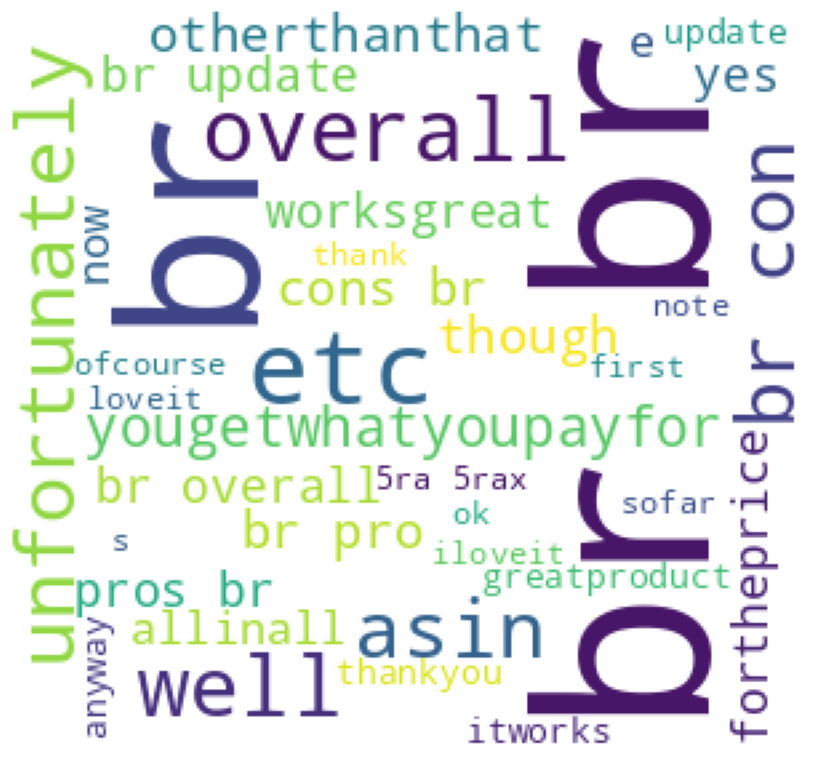

In [12]:
wordcloud = WordCloud(width=800, height=800, background_color='white', mask=pic, min_font_size=12).generate(comment_words)
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## 3. Bag of Words
It tells the occurence of word in the document.

In [13]:
 from sklearn.feature_extraction.text import CountVectorizer

In [14]:
documents = ['This is the first document',
             'This document is the second document',
             'And this is the third document.',
             'Is this is the first document?']

In [15]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)

In [16]:
X_array = X.toarray()

In [17]:
feature_names = vectorizer.get_feature_names_out()

In [18]:
print("Feature Names:", feature_names)
print("Bag of Words: \n", X_array)

Feature Names: ['and' 'document' 'first' 'is' 'second' 'the' 'third' 'this']
Bag of Words: 
 [[0 1 1 1 0 1 0 1]
 [0 2 0 1 1 1 0 1]
 [1 1 0 1 0 1 1 1]
 [0 1 1 2 0 1 0 1]]
